In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import scipy.stats as stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 9.6.1 Support Vector Classifier

Original R code:
```r
set.seed (1)
x <- matrix(rnorm (20 * 2), ncol = 2)
y <- c(rep(-1, 10), rep(1, 10))
x[y == 1, ] <- x[y == 1, ] + 1
plot(x, col = (3 - y))
dat <- data.frame(x = x, y = as.factor(y))
write.csv(dat, "9_6_1_svm.csv", row.names=F)
```

(extracted 9_6_1_svm.csv data using r code above)

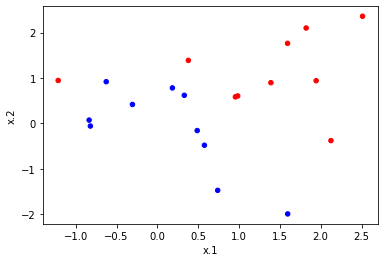

In [2]:
# check kaggle path, if not exist use local path from git repo
file = '/9_6_1_svm.csv'
path = '/kaggle/input/islr-v2' + file
 
# Check whether the specified
# path exists or not
if os.path.exists(path):
    df = pd.read_csv(path)
else:
    path = '../data' + file
    df = pd.read_csv(path)
df['color'] = df['y']
df['color'] = df['color'].replace(1, 'red')
df['color'] = df['color'].replace(-1, 'blue')
# note: you can chain plots with ax=ax after doing this
ax = df.plot(kind='scatter', x='x.1', y='x.2', c=df['color'])

```r
library(e1071)
svmfit <- svm(y ∼ ., data = dat , kernel = "linear", cost = 10, scale = FALSE)
```

In [3]:
# TODO: find out how to implement cost=10 and scale=FALSE pieces
model = SVC(kernel='linear', C=10)
# reshape data and train - note flipping x columns to match r code output
X = df[['x.2', 'x.1']].values  # .values.reshape(-1, 1)
y = df['y'].values  #.reshape(-1, 1)
model.fit(X, y)
df['y_pred'] = model.predict(X)
df.head()

,x.1,x.2,y,color,y_pred
0,-0.626454,0.918977,-1,blue,-1
1,0.183643,0.782136,-1,blue,1
2,-0.835629,0.074565,-1,blue,-1
3,1.595281,-1.989352,-1,blue,-1
4,0.329508,0.619826,-1,blue,1


```r
plot(svmfit , dat)
```

R notes from book at https://www.statlearning.com:
> Note that the two arguments to the SVM plot() function are the output of the call to svm(), as well as the data used in the call to svm(). The region of feature space that will be assigned to the −1 class is shown in light yellow, and the region that will be assigned to the +1 class is shown in red. The decision boundary between the two classes is linear (because we used the argument kernel = "linear"), though due to the way in which the plotting function is implemented in this library the decision boundary looks somewhat jagged in the plot. (Note that here the second feature is plotted on the x-axis and the first feature is plotted on the y-axis, in contrast to the behavior of the usual plot() function in R.) The support vectors are plotted as crosses and the remaining observations are plotted as circles; we see here that there are seven support vectors. (pg. 389)

A helpful resource in translating R code to Python below: https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

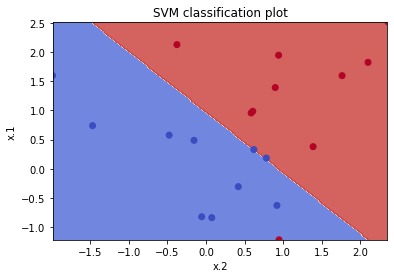

In [4]:
# approximate of the r graph generated from code above
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('x.2')
plt.ylabel('x.1')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM classification plot');

In [5]:
# check the values that were misclassified using visual (zoomed in makes it hard to see some of them, can add +/-1 to max/min values above)
df[(df['x.2'] > .75) & (df['x.2'] < 1)]

,x.1,x.2,y,color,y_pred
0,-0.626454,0.918977,-1,blue,-1
1,0.183643,0.782136,-1,blue,1
11,1.389843,0.897212,1,red,1
13,-1.214700,0.946195,1,red,-1
17,1.943836,0.940687,1,red,1


In [6]:
# check the values that were misclassified comparing values
df[df['y'] != df['y_pred']]

,x.1,x.2,y,color,y_pred
1,0.183643,0.782136,-1,blue,1
4,0.329508,0.619826,-1,blue,1
13,-1.214700,0.946195,1,red,-1


There are seven support vectors. We can determine their identities as follows:

```r
svmfit$index
[1] 1 2 5 7 14 16 17
```

In [7]:
model.support_

array([ 0,  1,  4,  6, 13, 15, 16], dtype=int32)

In [8]:
model.support_vectors_

array([[ 0.91897737, -0.62645381],
       [ 0.7821363 ,  0.18364332],
       [ 0.61982575,  0.32950777],
       [-0.15579551,  0.48742905],
       [ 0.94619496, -1.21469989],
       [ 0.58500544,  0.95506639],
       [ 0.60571005,  0.98380974]])